In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./Datasets', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./Datasets', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./Datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./Datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./Datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./Datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./Datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./Datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Datasets/MNIST/raw



In [3]:
X_train = MNIST_train.data
y_train = MNIST_train.train_labels
X_test = MNIST_test.data
y_test = MNIST_test.test_labels

/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/alex/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


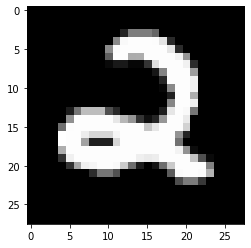

In [4]:
from matplotlib import pyplot as plt
import random

first_image = X_test[random.randrange(len(X_test))]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [6]:
X_train = X_train.float()
X_test = X_test.float()

In [7]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [8]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

In [9]:
X_train = X_train.reshape([-1,28*28])

In [10]:
X_test = X_test.reshape([-1,28*28])

In [11]:
X_train.shape, X_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [12]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [14]:
batch_size = 100

epoch_accuracy = []
epoch_loss = []

train_epoch_accuracy = []
train_epoch_loss = []
batch_indexes = None
preds = None

for epoch in range(60):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0,len(X_train),batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_net.forward(X_batch)
        
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    
    train_epoch_accuracy.append((preds.argmax(dim=1) == y_train[batch_indexes]).float().mean())
    
    test_preds = mnist_net.forward(X_test)
    epoch_loss.append(loss(test_preds,y_test))
    train_epoch_loss.append(loss(preds,y_train[batch_indexes]))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    
    epoch_accuracy.append(accuracy)
    

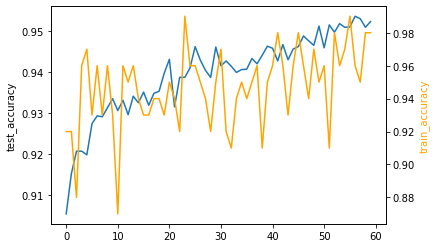

In [15]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(epoch_accuracy, label= 'test_accuracy')
ax2.plot(train_epoch_accuracy, label = 'train_accuracy', color='orange')
ax1.set_ylabel('test_accuracy')
ax2.set_ylabel('train_accuracy', color='orange')
plt.show()

In [16]:
ax1.plot(epoch_accuracy, label= 'test_accuracy')
ax2.plot(train_epoch_accuracy, label = 'train_accuracy', color='orange')
ax1.set_ylabel('test_accuracy')
ax2.set_ylabel('train_accuracy', color='orange')
plt.show()

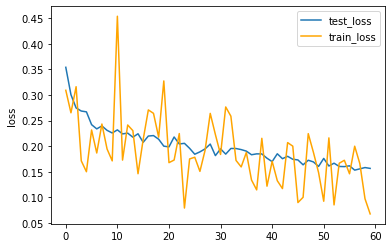

In [24]:
plt.plot(list(map(lambda x:x.detach().numpy() ,epoch_loss)), label='test_loss')
plt.plot(list(map(lambda x:x.detach().numpy() ,train_epoch_loss)), color='orange', label= 'train_loss')
plt.ylabel('loss')
plt.legend()
plt.show() 